<a href="https://colab.research.google.com/github/aravindrepository/Multiple_Disease_prediction/blob/main/Multiple_Disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install --quiet pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 904.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 71.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 55.3 MB/s eta 0:00:00
   ━━

In [3]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import json

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

from pycaret.classification import *
import ast
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns

Import all the files(test and train)

In [4]:
data=pd.read_csv('main.csv')

In [5]:
data

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,Insulin,BMI,Systolic Blood Pressure,Diastolic Blood Pressure,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,0.034129,0.071774,0.185596,0.071455,0.653472,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,0.571162,0.839271,0.580903,0.556037,0.477742,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,0.582170,0.577423,0.045782,0.663642,0.088940,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,0.620258,0.169059,0.139289,0.160496,0.406528,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,0.184371,0.580175,0.118461,0.005579,0.414407,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346,0.012956,0.336925,0.451218,0.175006,0.734664,0.382770,0.656463,0.177502,0.808162,0.684499,0.883908,0.257120,0.102022,0.356098,0.928344,0.670665,0.311568,0.595083,0.155866,0.885812,0.636125,0.132226,0.716519,0.006121,Diabetes
2347,0.407101,0.124738,0.983306,0.663867,0.361113,0.663716,0.232516,0.341056,0.847441,0.309766,0.525230,0.558362,0.741009,0.678500,0.299213,0.491185,0.701914,0.218104,0.790341,0.570902,0.339125,0.310964,0.310900,0.622403,Thalasse
2348,0.344356,0.783918,0.582171,0.996841,0.065363,0.242885,0.658851,0.543017,0.290106,0.838722,0.788944,0.660676,0.597290,0.663382,0.572330,0.141738,0.155871,0.473638,0.250535,0.387197,0.344728,0.606719,0.395145,0.134021,Anemia
2349,0.351722,0.014278,0.898615,0.167550,0.727148,0.046091,0.900434,0.136227,0.134361,0.279219,0.078163,0.411167,0.355545,0.114380,0.191626,0.570553,0.171245,0.858352,0.362012,0.290984,0.996873,0.882164,0.411158,0.146255,Diabetes


In [6]:
data.size

58775

In [7]:
data.shape

(2351, 25)

Test data2

In [8]:
data_t=pd.read_csv('test.csv')

In [9]:
data_t.head(3)

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,Insulin,BMI,Systolic Blood Pressure,Diastolic Blood Pressure,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.001827,0.033693,0.114755,0.997927,0.562604,0.866499,0.578042,0.914615,0.026864,0.038641,0.645755,0.070888,0.616684,0.168031,0.970168,0.653230,0.186104,0.430398,0.016678,0.885352,0.652733,0.788235,0.054788,0.031313,Thalasse
1,0.436679,0.972653,0.084998,0.180909,0.675736,0.563889,0.798382,0.670361,0.376092,0.184890,0.353929,0.681551,0.498084,0.216581,0.517805,0.833540,0.153001,0.458533,0.401845,0.635969,0.574425,0.047025,0.607985,0.594123,Diabetes
2,0.545697,0.324815,0.584467,0.475748,0.558596,0.661007,0.934056,0.381782,0.500342,0.531829,0.310422,0.454435,0.966303,0.967512,0.521000,0.678901,0.220479,0.817151,0.690981,0.101633,0.855740,0.551124,0.413294,0.070909,Heart Di


In [10]:
data.shape

(2351, 25)

In [12]:
data3=pd.concat([data,data_t],axis=0)
data.head(3)

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,Insulin,BMI,Systolic Blood Pressure,Diastolic Blood Pressure,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,0.034129,0.071774,0.185596,0.071455,0.653472,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,0.571162,0.839271,0.580903,0.556037,0.477742,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,0.582170,0.577423,0.045782,0.663642,0.088940,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse


In [13]:
data3.nunique()

,0
Glucose,551
Cholesterol,551
Hemoglobin,551
Platelets,551
White Blood Cells,551
Red Blood Cells,551
Hematocrit,551
Mean Corpuscular Volume,551
Mean Corpuscular Hemoglobin,551
Mean Corpuscular Hemoglobin Concentration,551


In [14]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2837 entries, 0 to 485
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    2837 non-null   float64
 1   Cholesterol                                2837 non-null   float64
 2   Hemoglobin                                 2837 non-null   float64
 3   Platelets                                  2837 non-null   float64
 4   White Blood Cells                          2837 non-null   float64
 5   Red Blood Cells                            2837 non-null   float64
 6   Hematocrit                                 2837 non-null   float64
 7   Mean Corpuscular Volume                    2837 non-null   float64
 8   Mean Corpuscular Hemoglobin                2837 non-null   float64
 9   Mean Corpuscular Hemoglobin Concentration  2837 non-null   float64
 10  Insulin                       

In [15]:
data3.reset_index(drop=True, inplace=True)

###configuring pyCaret

In [16]:
s = setup(data=data3,
          target= 'Disease',
          experiment_name='DiseasePrediction',
          session_id=42,
          train_size=0.8)

,Description,Value
0,Session id,42
1,Target,Disease
2,Target type,Multiclass
3,Target mapping,"Anemia: 0, Diabetes: 1, Healthy: 2, Heart Di: 3, Thalasse: 4, Thromboc: 5"
4,Original data shape,"(2837, 25)"
5,Transformed data shape,"(2837, 25)"
6,Transformed train set shape,"(2269, 25)"
7,Transformed test set shape,"(568, 25)"
8,Numeric features,24
9,Preprocess,True


In [17]:
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9925,0.9999,0.9925,0.9914,0.9914,0.9903,0.9903,6.8380
xgboost,Extreme Gradient Boosting,0.9815,0.9997,0.9815,0.9818,0.9805,0.9759,0.9761,0.3200
gbc,Gradient Boosting Classifier,0.9727,0.0000,0.9727,0.9662,0.9688,0.9644,0.9647,3.2560
dt,Decision Tree Classifier,0.9559,0.9717,0.9559,0.9565,0.9549,0.9429,0.9431,0.0520
rf,Random Forest Classifier,0.9511,0.9989,0.9511,0.9498,0.9469,0.9360,0.9379,0.4770
et,Extra Trees Classifier,0.9335,0.9969,0.9335,0.9321,0.9282,0.9127,0.9164,0.2730
knn,K Neighbors Classifier,0.8907,0.9626,0.8907,0.8867,0.8851,0.8587,0.8609,0.0590
svm,SVM - Linear Kernel,0.8272,0.0000,0.8272,0.8302,0.8218,0.7747,0.7786,0.0740
lr,Logistic Regression,0.8193,0.0000,0.8193,0.8156,0.8138,0.7638,0.7659,0.6610
nb,Naive Bayes,0.8136,0.9670,0.8136,0.8184,0.8093,0.7560,0.7598,0.0450


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [18]:
finalized_model = finalize_model(best_model)

###Predictions and Evaluation

In [19]:
predict_model(finalized_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease,prediction_label,prediction_score
323,0.486315,0.284191,0.312667,0.991188,0.871990,0.488554,0.494564,0.833600,0.190714,0.665649,...,0.296264,0.786579,0.469085,0.552644,0.138875,0.017570,0.585466,Thalasse,Thalasse,1.0
2475,0.933647,0.745056,0.208453,0.005611,0.587051,0.930807,1.000857,0.508231,0.531004,0.407995,...,0.200230,0.924343,0.257019,0.848974,0.816341,0.746330,0.119522,Diabetes,Diabetes,1.0
1090,0.389399,0.462404,0.480595,0.228912,0.781088,0.889100,0.201787,0.298939,0.285184,0.669895,...,0.767014,0.749700,0.070974,0.932907,0.382647,0.483517,0.049015,Healthy,Healthy,1.0
950,0.590548,0.838305,0.982231,0.312286,0.231827,0.232005,0.088997,0.564043,0.732186,0.971942,...,0.852007,0.363001,0.805746,0.153940,0.179071,0.411124,0.477137,Diabetes,Diabetes,1.0
1519,0.389399,0.462404,0.480595,0.228912,0.781088,0.889100,0.201787,0.298939,0.285184,0.669895,...,0.767014,0.749700,0.070974,0.932907,0.382647,0.483517,0.049015,Healthy,Healthy,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.143772,0.089600,0.027259,0.171121,0.744950,0.452787,0.871778,0.995263,0.872038,0.311175,...,0.200323,0.363050,0.558191,0.304237,0.306539,0.566289,0.754189,Thalasse,Thalasse,1.0
2577,0.644095,0.688230,0.339429,0.412603,0.094132,0.730829,0.397296,0.194087,0.775216,0.924087,...,0.687388,0.078232,0.880475,0.509616,0.213716,0.463652,0.792351,Diabetes,Diabetes,1.0
1456,0.729868,0.905026,0.520473,0.306955,0.743164,0.667150,0.769573,0.183771,0.246542,0.161920,...,0.341007,0.797158,0.994460,0.591303,0.425296,0.007490,0.196192,Diabetes,Diabetes,1.0
1982,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.512941,0.064187,0.610826,0.939485,0.095512,0.465957,0.769230,Healthy,Healthy,1.0


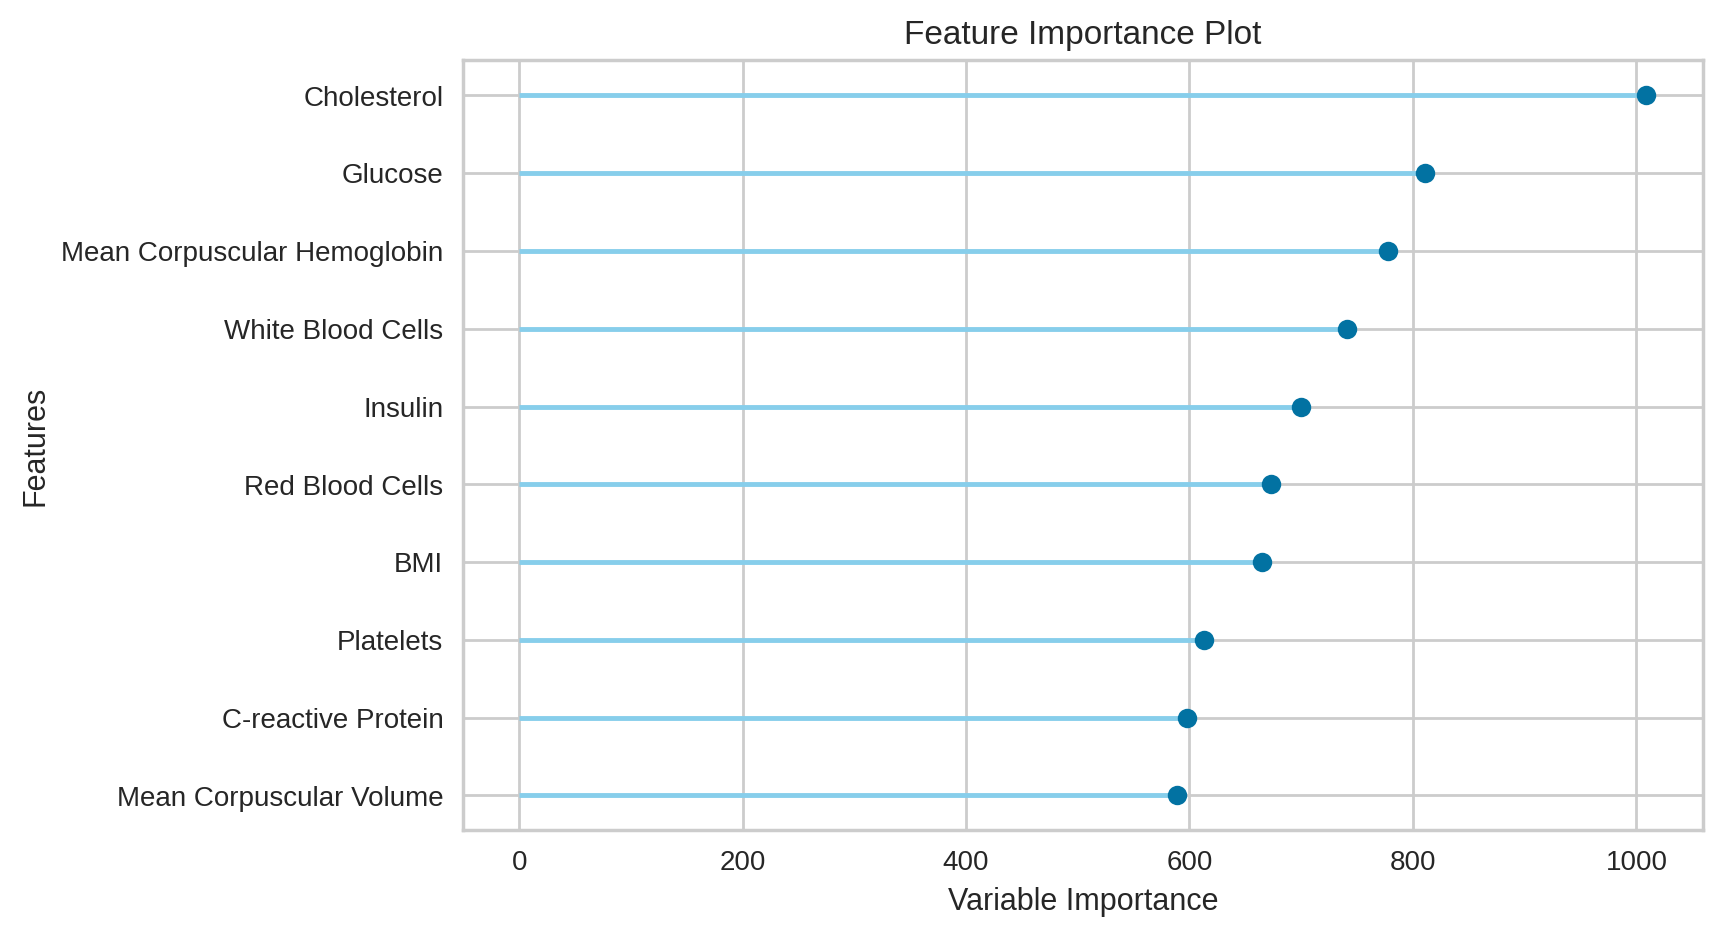

In [20]:
plot_model(finalized_model, plot='feature')

In [21]:
import plotly.express as px

def impact_on_disease(dataframe, feature_name):
    fig = px.box(data_frame=dataframe,
                 x='Disease',
                 y=feature_name,
                 color='Disease',
                 title=f'Impact of {feature_name} on Disease')
    fig.update_layout(plot_bgcolor='#111', paper_bgcolor='#111')
    fig.show()
columns_to_plot = ['Cholesterol', 'Glucose','Mean Corpuscular Hemoglobin','White Blood Cells']

###disease based on cholestrol impact

In [22]:
import plotly.express as px
fig = px.violin(data3, y='Cholesterol', x='Disease', color='Disease', box=True, points='all',
                title='Distribution of Cholesterol Levels by Disease State')
fig.update_layout(plot_bgcolor='#111', paper_bgcolor='#111')
fig.show()

from here we can observe Diabetes and heart diseases are more likely to be the Result (based on cholestrol)

###disease based on Gulcose

In [23]:
impact_on_disease(data3, 'Glucose')

From this we can predict Diabetes is the Result(based on Gulcose)

###disease based on White Blood Cells

In [24]:
fig_wbc = px.violin(data3, y='White Blood Cells', x='Disease', color='Disease', box=True, points='all',
                title='Distribution of White Blood Cells by Disease State')
fig_wbc.update_layout(plot_bgcolor='#111', paper_bgcolor='#111')
fig_wbc.show()

### **Summary**
The analysis has identified fluctuations in specific parameters associated with the disease, including Cholesterol, Glucose, Mean Corpuscular Hemoglobin, and White Blood Cell count. However, it is still unclear whether these changes are a result of the disease or if they play a role in its development. Additional research is needed to determine a definitive relationship between these variations and the disease

Thank You!!!!  ;)

if the vistualizations are not visible pls open in collab